In [31]:
# Nepieciešamās bibliotēkas un bibliotēku moduļi:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Moduļi datu normēšanai
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split


# Parauga datu kopas:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.datasets import make_blobs
import mglearn

/home/skrs/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/skrs/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Klasifikācijas un klasterizācijas ML problēmas  

Apskatīsim SVC, Logistic Regression un Decision Tree algoritmus, kas ir **klasifikācijas algoritmi**, kā arī K-means klasterizācijas algoritmu. 

### Support Vector Classifier (SVC) jeb klasifikācija, izmantojot hiperplaknes.  

SVC ir skaitliski viegls modelis, kas var kalpot kā labs sākums jebkuram binārās klasifikācijas uzdevumam.  

Tāpat kā nākamajā algoritmā, šeit, nevis, lai izmantotu kādu vienkāršu parametru kā izsvērt vidējo vērtību tuvākajiem n kaimiņiem vai aprēķinātu kādas statistiskas īpašības pa kolonnām, mēs mēģinam piedzīt n argumentu (n ir liels) lineāru funkciju (n - 1 dimensionālo plakni).

In [23]:
from sklearn.svm import LinearSVC

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

clf = LinearSVC().fit(X_train, y_train)
print("training set precision: ",clf.score(X_train,y_train))
print("test set precision: ",clf.score(X_test,y_test))

training set precision:  0.9131455399061033
test set precision:  0.9230769230769231


/home/skrs/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Logistic Regression klasifikators  

Par spīti nosaukumam, Logistic Regression NAV regresijas modelis, bet klasifikācijas modelis, kas piemērots binārajai klasifikācijai.

Apskatīsim loģistisko regresiju, kas labi piemērota binārās klasifikācijas uzdevumiem. Atšķirībā no SVC, šeit izmantojam specifisku funkciju, ko sauc arī par loģistisko funkciju

Apskatīsim padziļinātāk arī kā hiperparametru pielāgošana var mainīt modeļa uzvedību.

In [27]:
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


/home/skrs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.951


/home/skrs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/home/skrs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92


/home/skrs/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


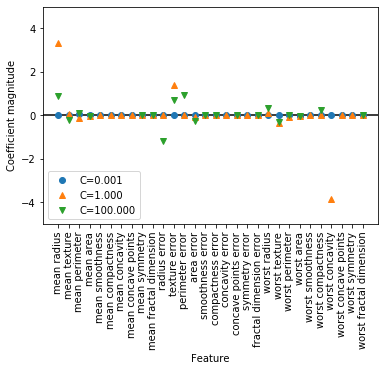

In [30]:
# Šeit variējam C parametru (inverso regularizācijas stiprumu)

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

### Lēmumu koku algoritmi  

Lēmumu koki ņem daudzdimensiju datu kopu un cenšās to sadalīt pēc iespēs labāk, izmantojot if / else tipa loģiku.  
Priekšrocības:  
* Nav nepieciešama būtiska datu priekšapstrāde  
* Grupu robežām var būt patvaļīga forma    
* Algoritms labi pielāgojas datiem  

Trūkumi:  
* Grupu robežas var drastiski mainīties, ja dažiem punktiem mazliet mainās vērtība  
* Algoritms pārāk labi pielāgojas datiem  

[koda avots](https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb)

In [37]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [40]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [41]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


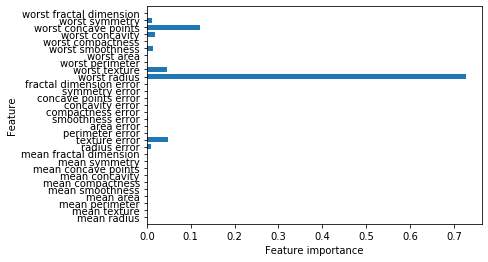

In [42]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

### Lēmumu koku optimizēšana    
Lēmumu koki ir ārkārtīgi spēcīga klasifikācijas metode, kuras vislielākais trūkums ir overfittings.  
Par laimi, ar šo problēmu var cīnīties ar dažām metodēm. 
* Koku apcirpšana  
* Koku ansambļi  

### K-means klasterizācijas algoritms  
[avots](https://towardsdatascience.com/k-means-clustering-explained-4528df86a120)  
* Randomly select centroids (center of cluster) for each cluster.  
* Calculate the distance of all data points to the centroids.  
* Assign data points to the closest cluster.  
* Find the new centroids of each cluster by taking the mean of all data points in the cluster.  
* Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving.  

K-means klasterizācijas algoritma priekšrocības klasterizācijā ir tādas pašas, kā knn algoritmam klasifikācijā t.i. algoritms ir vienkāršs, rezultātus ir viegli interpretēt un vizualizēt, bet ir arī līdzīgi trūkumi - Jūtība uz outlieriem un dimensionalitātes lāsts.  

Vēl citi + un - :  
* Tas, ka punkts tiek ieklasterizēts kādā grupā izejot no attāluma no centroīdas nozīmē, ka klasteru robežas tiek postulētas kā lineāras, kas bieži vien neatbilst realitātei.  
* Tāpat kā knn, variējošs punktu blīvums var nobīdīt klasteru robežas uz vienu pusi  
* Centroīdu sākumstāvokļus var gudri uzminēt, būtiski saīsinot algoritma darbības laiku.  

In [3]:
from sklearn.cluster import KMeans
%matplotlib inline

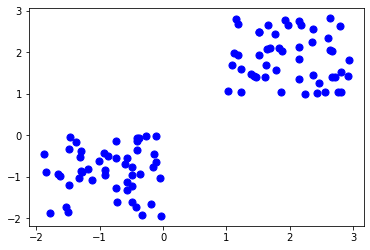

In [6]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [8]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean.fit(X)

KMeans(n_clusters=2)

In [16]:
kmean.cluster_centers_
x_coords = []
y_coords = []
for pair in kmean.cluster_centers_:
    x_coords.append(pair[0])
    y_coords.append(pair[1])

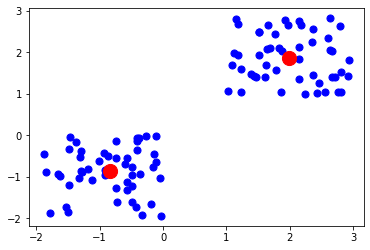

In [18]:
plt.scatter(X[:,0], X[:,1], s =50, c='b')
plt.scatter(x_coords,y_coords,color='red',s=200)
plt.show()

In [19]:
Kmean.labels_
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([0])

In [3]:
X, y = make_blobs(n_samples = 200, centers=3, cluster_std = 0.5, random_state = 0)

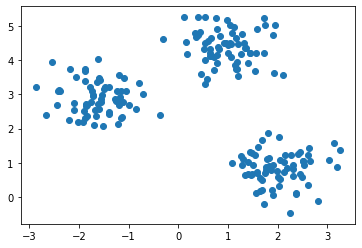

In [13]:
plt.scatter(X[:,0],X[:,1])